In [1]:
import math
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from numpy import loadtxt, where
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('grades.csv')

#df.columns = ['grade1','grade2','label']
df.head()

,grade1,grade2,label;;;;
0,34.623660,78.024693,0;;;;
1,30.286711,43.894998,0;;;;
2,35.847409,72.902198,0;;;;
3,60.182599,86.308552,1;;;;
4,79.032736,75.344376,1;;;;


In [3]:
X = df[['grade1','grade2']]
X =np.array(X)
df['label']  = df['label;;;;'].map(lambda x: float(x.rstrip(';')))

In [4]:
df.head()

,grade1,grade2,label;;;;,label
0,34.623660,78.024693,0;;;;,0.0
1,30.286711,43.894998,0;;;;,0.0
2,35.847409,72.902198,0;;;;,0.0
3,60.182599,86.308552,1;;;;,1.0
4,79.032736,75.344376,1;;;;,1.0


In [5]:
df.drop(['label;;;;'],axis=1,inplace=True)

In [6]:
df.head()

,grade1,grade2,label
0,34.623660,78.024693,0.0
1,30.286711,43.894998,0.0
2,35.847409,72.902198,0.0
3,60.182599,86.308552,1.0
4,79.032736,75.344376,1.0


In [7]:
y = df['label']
print(y.value_counts())
y = np.array(y)
X.shape
#y.shape

1.0    60
0.0    40
Name: label, dtype: int64


(100, 2)

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30)

In [9]:
clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
scikit_score = clf.score(X_test,y_test)
print ('score Scikit learn: ', clf.score(X_test,y_test))

score Scikit learn:  0.6


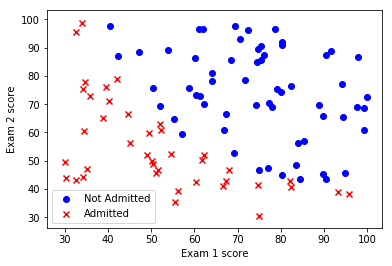

In [11]:
# visualize data, uncomment "show()" to run it
pos = where(y == 1)
neg = where(y == 0)
plt.scatter(X[pos, 0], X[pos, 1], marker='o', c='b')
plt.scatter(X[neg, 0], X[neg, 1], marker='x', c='r')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Not Admitted', 'Admitted'])


In [12]:
def Sigmoid(z):
    G_of_Z = float(1.0 / float((1.0 + math.exp(-1.0*z))))
    return G_of_Z 

In [13]:
def Hypothesis(theta, x):
    z = 0
    for i in range(len(theta)):
        z += x[i]*theta[i]
    return Sigmoid(z)

In [14]:
def Cost_Function(X,Y,theta,m):
    sumOfErrors = 0
    for i in range(m):
        xi = X[i]
        hi = Hypothesis(theta,xi)
        if Y[i] == 1:
            error = Y[i] * math.log(hi)
        elif Y[i] == 0:
            error = (1-Y[i]) * math.log(1-hi)
        sumOfErrors += error
    const = -1/m
    J = const * sumOfErrors
    print ('cost is ', J )
    return J

In [15]:
def Cost_Function_Derivative(X,Y,theta,j,m,alpha):
    sumErrors = 0
    for i in range(m):
        xi = X[i]
        xij = xi[j]
        hi = Hypothesis(theta,X[i])
        error = (hi - Y[i])*xij
        sumErrors += error
    m = len(Y)
    constant = float(alpha)/float(m)
    J = constant * sumErrors
    return J

In [16]:
def Gradient_Descent(X,Y,theta,m,alpha):
    new_theta = []
    constant = alpha/m
    for j in range(len(theta)):
        CFDerivative = Cost_Function_Derivative(X,Y,theta,j,m,alpha)
        new_theta_value = theta[j] - CFDerivative
        new_theta.append(new_theta_value)
    return new_theta

In [29]:
def Logistic_Regression(X,Y,alpha,theta,num_iters):
    m = len(Y)
    for x in range(num_iters):
        new_theta = Gradient_Descent(X,Y,theta,m,alpha)
        theta = new_theta
        if x % 100 == 0:
        #here the cost function is used to present the final hypothesis of the model in the same form for each gradient-step iteration
            Cost_Function(X,Y,theta,m)
            print ('theta ', theta)	
            print ('cost is ', Cost_Function(X,Y,theta,m))
    return theta       

In [30]:
initial_theta = [0,0]
alpha = 0.1
iterations = 1000